In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('pairs-label-training (1).txt')

In [4]:
df.head()

,p1,p2,bias
0,98,651,0
1,696,1870,1
2,1073,1620,0
3,167,633,0
4,4,640,0


In [5]:
clean=pd.read_csv('clean_data.csv')

In [6]:
clean.head()

,Unnamed: 0,ID,text,clean_text
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo


In [7]:
def jaro_count_method(s1,s2):
    from strsimpy.jaro_winkler import JaroWinkler

    jarowinkler = JaroWinkler()
    simi=[]
    simi.append(jarowinkler.similarity(s1,s2))
   
    return simi

In [8]:
def jaro_sim(df,clean,bias):
    _sim=[]
    for i,rows in df[df['bias']==bias].iterrows():
        
        
        s1=str(clean[clean['ID']==rows["p1"]].iloc[0,3])
        s2=str(clean[clean['ID']==rows["p2"]].iloc[0,3])
        _sim.append(jaro_count_method(s1,s2))
    return _sim   
    

In [9]:
_sim_0=[]
_sim_1=[]

In [10]:
_sim_0=jaro_sim(df,clean,0)
_sim_1=jaro_sim(df,clean,1)

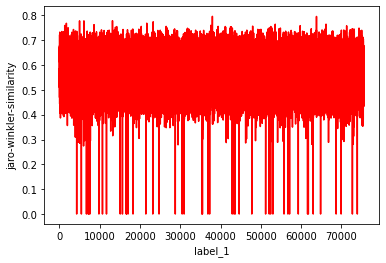

In [19]:
import matplotlib.pyplot as pp
pp.plot(_sim_1,'r')
pp.xlabel('label_1')
pp.ylabel('jaro-winkler-similarity')
pp.savefig('sim_1',transparent=True)

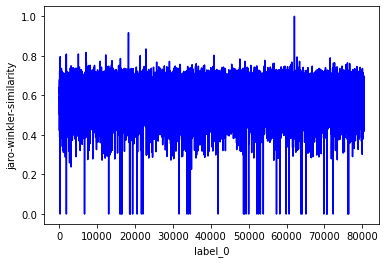

In [18]:
pp.plot(_sim_0,'b')
pp.xlabel('label_0')
pp.ylabel('jaro-winkler-similarity')
pp.savefig('sim_0',transparent=True)